In [ ]:
%pip install multion
%pip install agentops

# Stream

In [ ]:
import multion
from multion.client import MultiOn
from multion.sessions.types.sessions_step_request_browser_params import (
    SessionsStepRequestBrowserParams,
)
from multion.core.request_options import RequestOptions
import os

multion = MultiOn(
    api_key=os.environ.get("MULTION_API_KEY"),
    agentops_api_key=os.environ.get("AGENTOPS_API_KEY"),
)

url = "https://www.agentops.ai/"
cmd = "what three things do i get with agentops"
create_session_response = multion.sessions.create(url=url)
session_id = create_session_response.session_id
print(create_session_response.message)
browser_params = SessionsStepRequestBrowserParams(height=1.1, width=1.1)
request_options = RequestOptions(
    timeout_in_seconds=60, max_retries=2, additional_headers={"test": "ing"}
)
step_session_response = multion.sessions.step(
    session_id=session_id,
    cmd=cmd,
    url=url,
    browser_params=browser_params,
    include_screenshot=True,
    request_options=request_options,
)
print(step_session_response.message)

while step_session_response.status == "CONTINUE":
    step_session_response = multion.sessions.step(
        session_id=session_id,
        cmd=cmd,
        url=url,
        include_screenshot=True,
    )
    print(step_session_response.message)

if step_session_response.status == "DONE":
    print("task completed")

get_screenshot = multion.sessions.screenshot(session_id=session_id)
close_session_response = multion.sessions.close(session_id=session_id)

# Step_Stream

In [ ]:
import multion
from multion.client import MultiOn
from multion.sessions.types.sessions_step_stream_request_browser_params import (
    SessionsStepStreamRequestBrowserParams,
)
from multion.core.request_options import RequestOptions
import os

multion = MultiOn(
    api_key=os.environ.get("MULTION_API_KEY"),
    agentops_api_key=os.environ.get("AGENTOPS_API_KEY"),
)

url = "https://www.agentops.ai/"
cmd = "what three things do i get with agentops"
create_session_response = multion.sessions.create(url=url)
session_id = create_session_response.session_id
print(create_session_response.message)
browser_params = SessionsStepStreamRequestBrowserParams(height=1.1, width=1.1)
request_options = RequestOptions(
    timeout_in_seconds=60, max_retries=2, additional_headers={"test": "ing"}
)
step_session_response = multion.sessions.step_stream(
    session_id=session_id,
    cmd=cmd,
    url=url,
    browser_params=browser_params,
    include_screenshot=True,
    request_options=request_options,
)

for chunk in step_session_response:
    if chunk.type == "final_event":
        break
    print(chunk.delta["content"])

while chunk.delta["status"] == "CONTINUE":
    step_session_response = multion.sessions.step_stream(
        session_id=session_id,
        cmd=cmd,
        url=url,
        include_screenshot=True,
    )
    for chunk in step_session_response:
        if chunk.type == "final_event":
            break
        print(chunk.delta["content"])

if chunk.delta["status"] == "DONE":
    print("task completed")

get_screenshot = multion.sessions.screenshot(session_id=session_id)
close_session_response = multion.sessions.close(session_id=session_id)

## Check your session
Check your session on [AgentOps](https://app.agentops.ai)

![2024-06-05 01.09.14.gif](<attachment:2024-06-05 01.09.14.gif>)

![Screenshot 2024-06-05 at 1.30.37 AM.png](<attachment:Screenshot 2024-06-05 at 1.30.37 AM.png>)
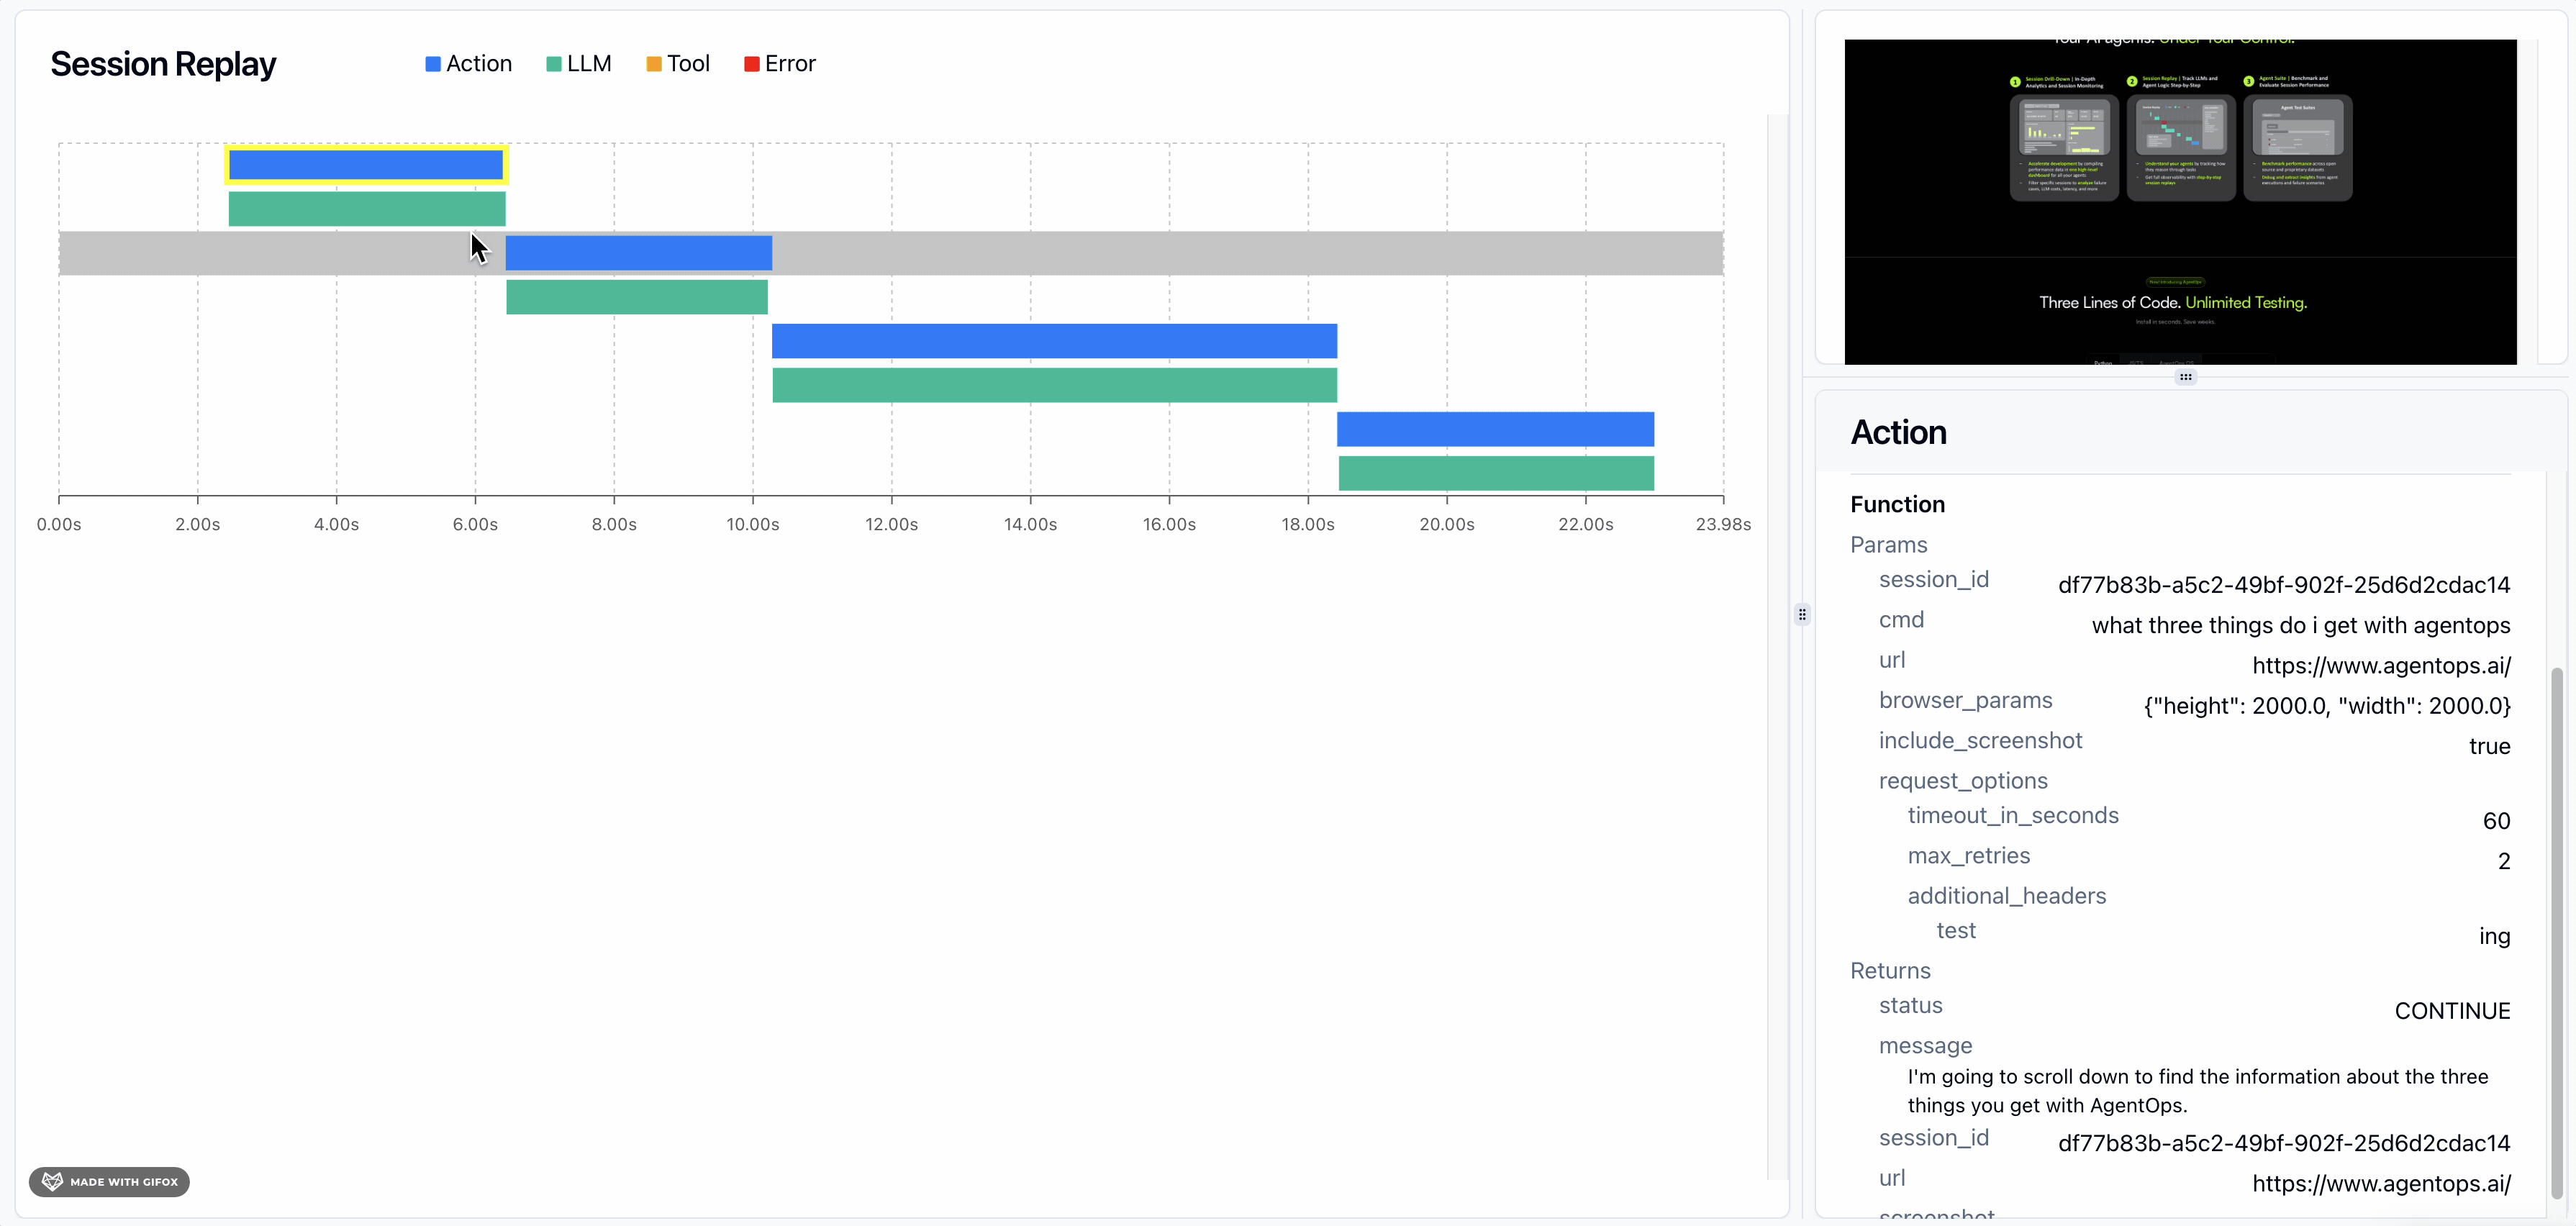
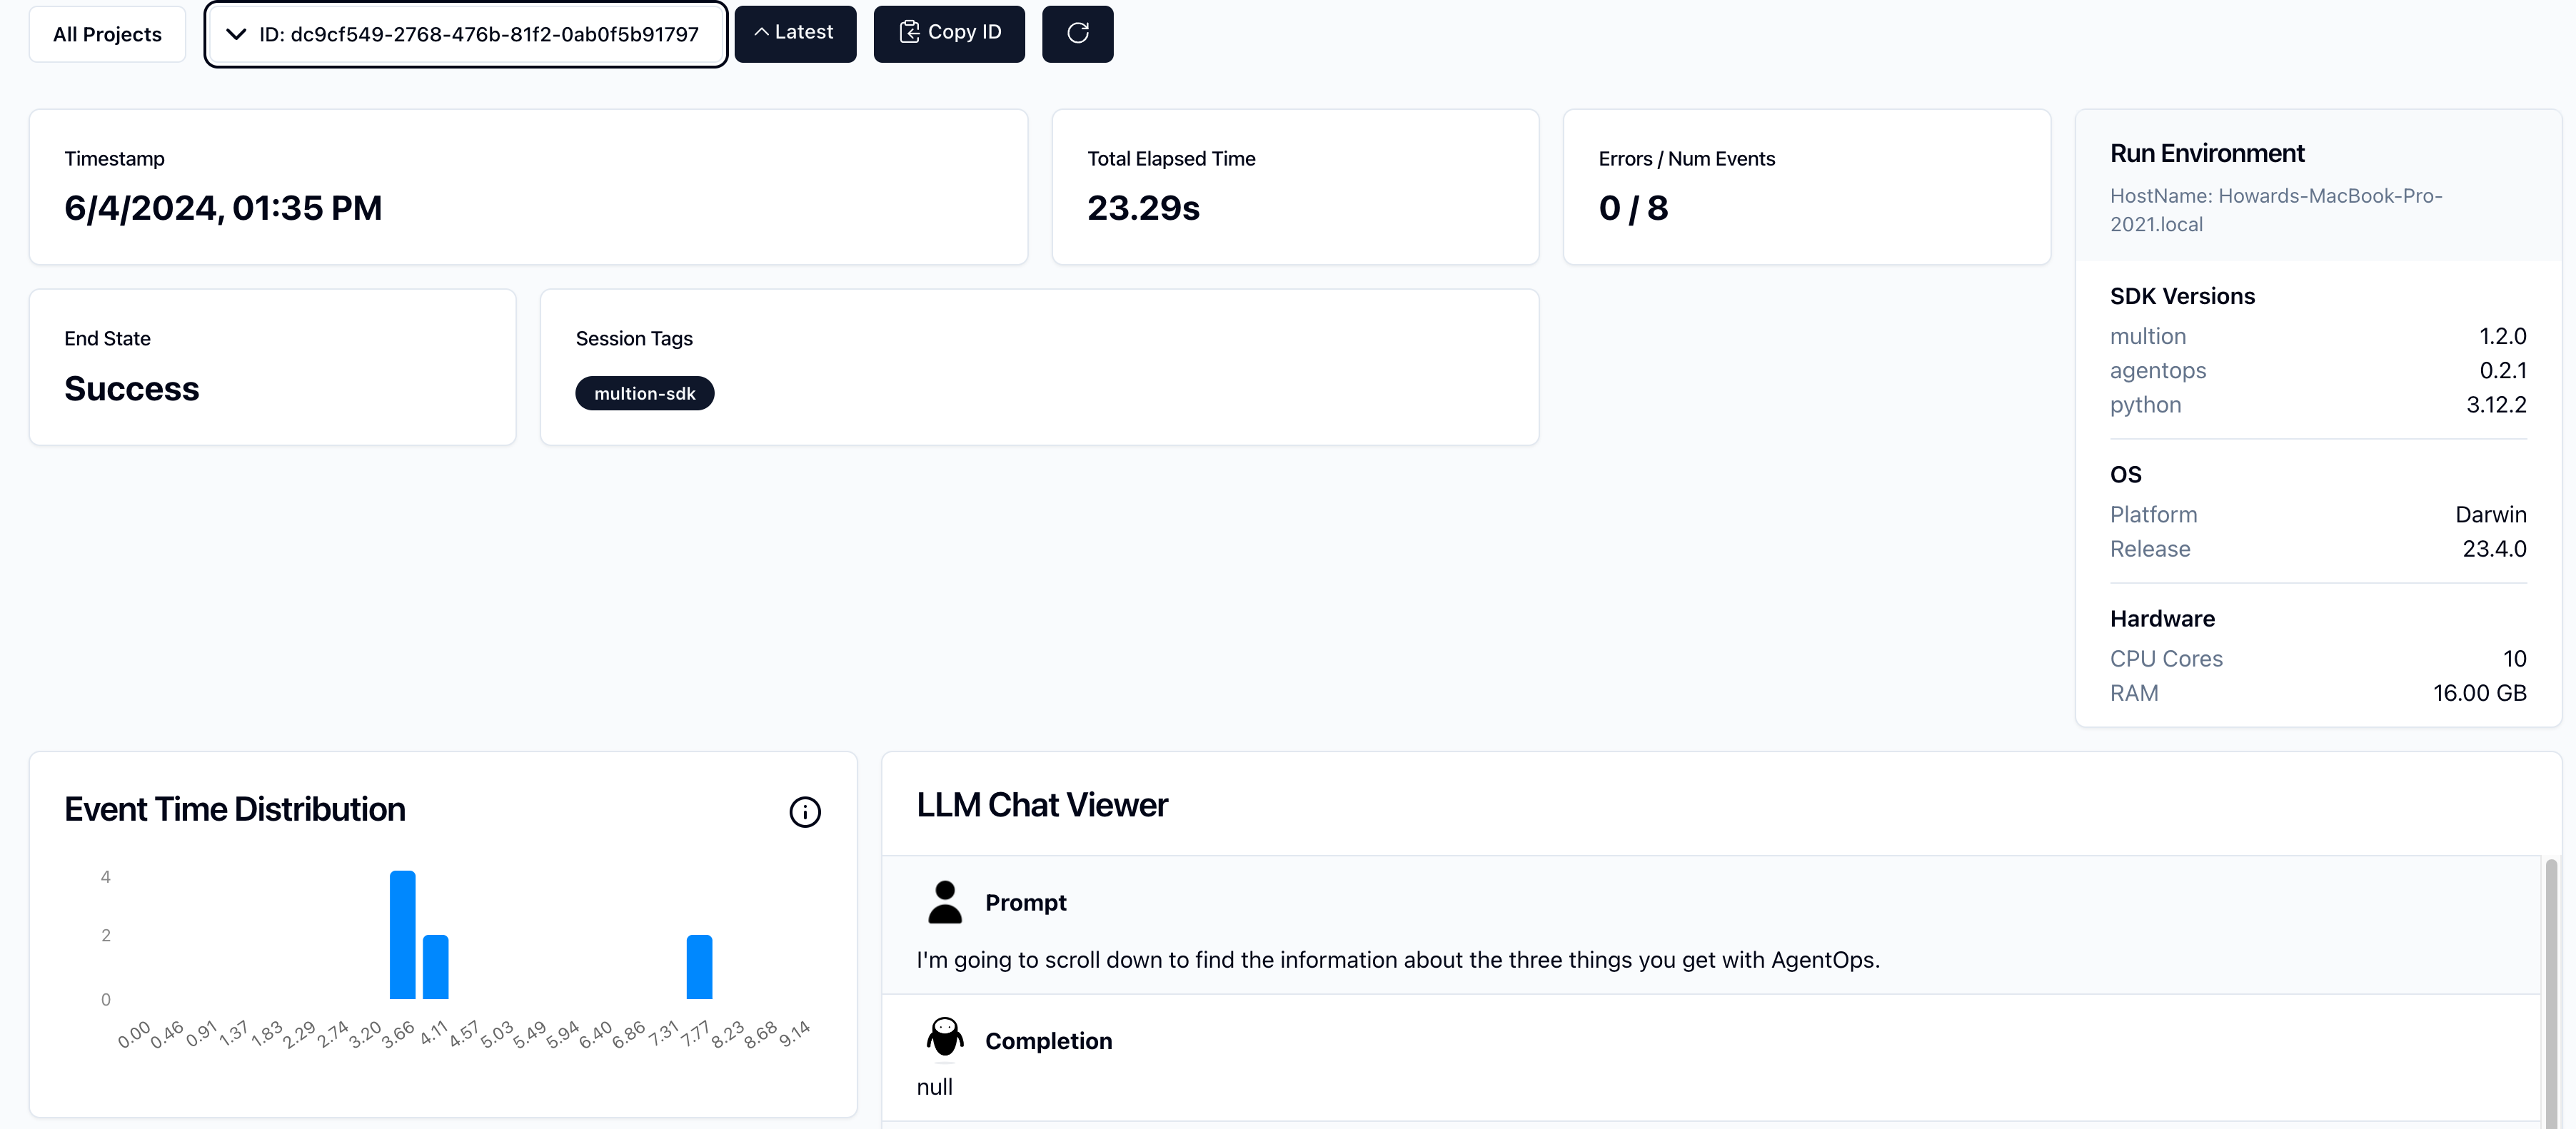